In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

In [19]:


def simulate_portfolio_pareto_quartiles(n_companies, alpha=1.8):
    """Simulate the return of a single portfolio with n_companies using a Pareto distribution."""
    # Pareto distribution for all returns
    returns = pareto.rvs(alpha, size=n_companies)
    average_return = np.mean(returns)
    return average_return


def simulate_and_plot( portfolio_sizes, n_simulations, alpha=1.8):
    """Simulate n_simulations portfolios with n_companies and plot the results."""
    # Store median, lower quartile, upper quartile, lower decile, and upper decile returns for each portfolio size
    medians_pareto = []
    lower_quartiles_pareto = []
    upper_quartiles_pareto = []
    lower_deciles_pareto = []
    upper_deciles_pareto = []


    # Perform simulations and calculate quartiles and deciles for Pareto distribution
    for size in portfolio_sizes:
        simulation_results_pareto = [simulate_portfolio_pareto_quartiles(size, alpha=alpha_value) 
                                    for _ in range(n_simulations)]
        medians_pareto.append(np.median(simulation_results_pareto))
        lower_quartiles_pareto.append(np.percentile(simulation_results_pareto, 25))
        upper_quartiles_pareto.append(np.percentile(simulation_results_pareto, 75))
        lower_deciles_pareto.append(np.percentile(simulation_results_pareto, 10))
        upper_deciles_pareto.append(np.percentile(simulation_results_pareto, 90))

    # Plotting the results for Pareto distribution with deciles
    plt.figure(figsize=(14, 8))
    plt.plot(portfolio_sizes, medians_pareto, marker='o', color='blue', label='Median')
    plt.plot(portfolio_sizes, lower_quartiles_pareto, marker='s', color='green', linestyle='--', label='Lower Quartile')
    plt.plot(portfolio_sizes, upper_quartiles_pareto, marker='^', color='red', linestyle='--', label='Upper Quartile')
    plt.plot(portfolio_sizes, lower_deciles_pareto, marker='x', color='purple', linestyle=':', label='Lower Decile')
    plt.plot(portfolio_sizes, upper_deciles_pareto, marker='d', color='orange', linestyle=':', label='Upper Decile')
    plt.title('Pareto Distribution (alpha=1.8) Portfolio Return Statistics vs Portfolio Size')
    plt.xlabel('Number of Companies in Portfolio')
    plt.ylabel('Portfolio Return')
    plt.grid(True)
    plt.legend()
    plt.show()


def plot_return_distribution(n_companies, n_simulations, alpha=1.8):
    """Plot the distribution of simulated returns for a specific number of companies."""
    # Simulate returns
    simulated_returns = [simulate_portfolio_pareto_quartiles(n_companies, alpha) for _ in range(n_simulations)]

    # Calculating the expected return (mean) and variance
    expected_return = np.mean(simulated_returns)
    variance_return = np.var(simulated_returns)

    # Plotting the distribution of returns
    plt.figure(figsize=(10, 6))
    plt.hist(simulated_returns, bins=200, color='skyblue', edgecolor='black', density=True)
    plt.axvline(expected_return, color='red', linestyle='dashed', linewidth=2, label=f'Expected Return: {expected_return:.2f}')
    plt.axvline(expected_return + np.sqrt(variance_return), color='green', linestyle='dashed', linewidth=2, label=f'Variance (Upper): {variance_return:.2f}')
    plt.axvline(expected_return - np.sqrt(variance_return), color='green', linestyle='dashed', linewidth=2, label=f'Variance (Lower): {variance_return:.2f}')
    plt.title(f'Distribution of Returns for {n_companies} Companies (Pareto, alpha={alpha})')
    plt.xlabel('Average Return')
    plt.ylabel('Density')
    plt.xlim(0, 30)  # Set x-axis range
    plt.legend()
    plt.grid(True)
    plt.show()




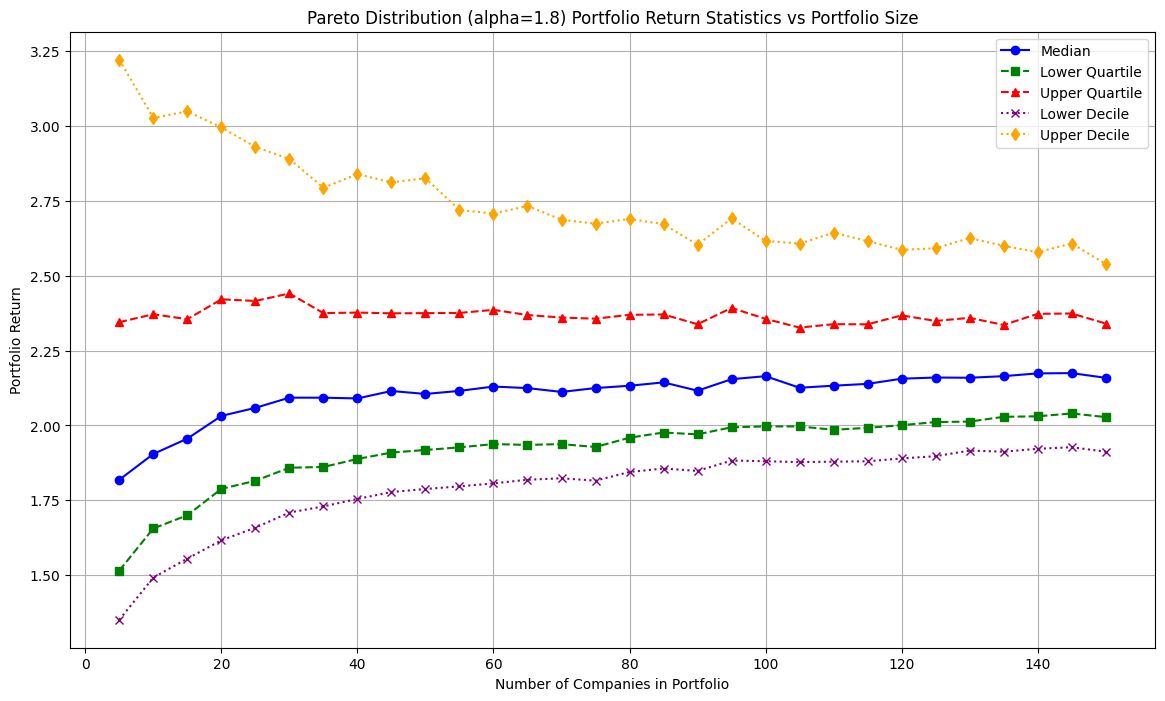

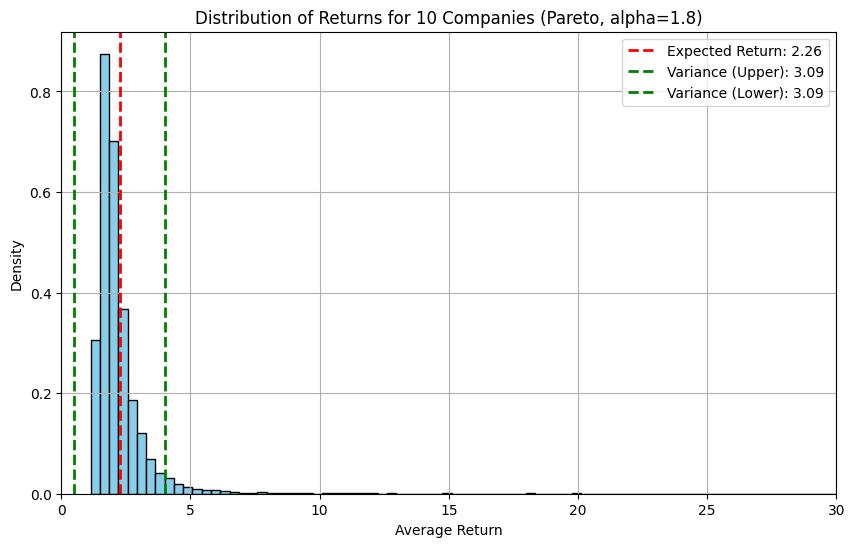

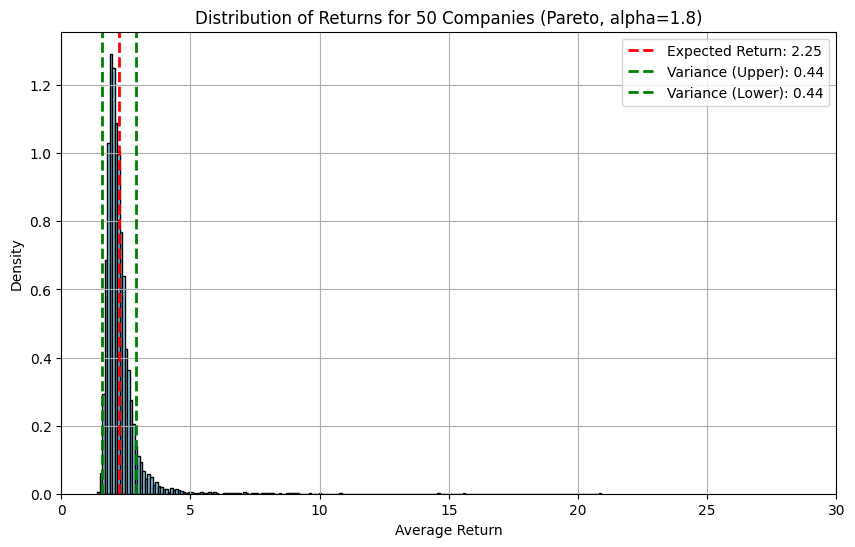

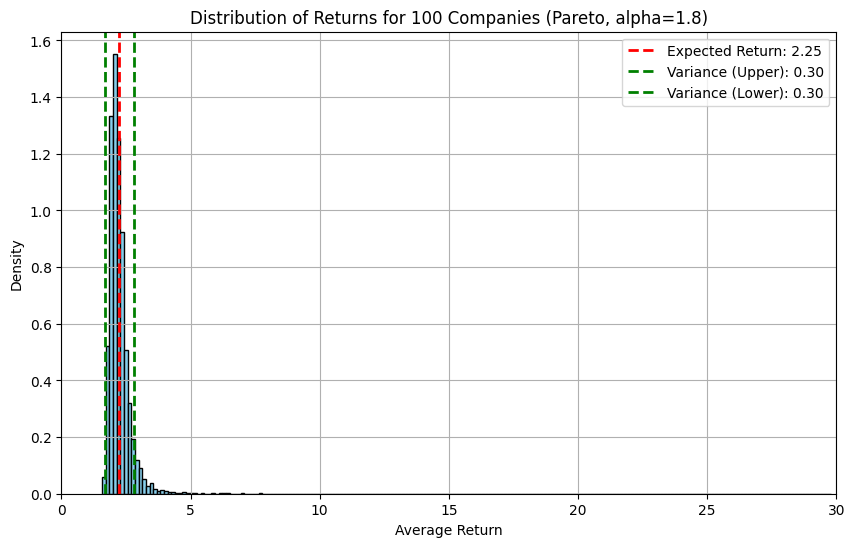

In [20]:

# Alpha value for the Pareto distribution
alpha_value = 1.8

# Range of portfolio sizes for the simulation (from 5 to 150 companies)
portfolio_sizes = range(5, 151, 5)


# Number of simulations per portfolio size
n_simulations = 1000

simulate_and_plot(portfolio_sizes, n_simulations, alpha=alpha_value)

plot_return_distribution(10, 10000, 1.8)
plot_return_distribution(50, 10000, 1.8)
plot_return_distribution(100, 10000, 1.8)
